In [78]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
keras = tf.keras

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Usar a sequential API para usar uma MLP de regressão é bem semelhante ao de classificação. As principais diferenças são que a camada de saída possui apenas um neurônio, não usar função de ativação e função de perda é MSE

__Ponto Importante:__ Diferente de visão computacional, dados tabulares não se beneficiam muito de redes profundas. Ou seja, vamos precisar de apenas uma camada oculta. Um baseline simples para seguir também é utilizar de 2x à 4x n_features.

Mais neurônios → mais capacidade → mais risco de overfitting

Mais camadas → mais complexidade → nem sempre útil em tabular

Isso são para MLPs

In [26]:
model = keras.models.Sequential([
    keras.Input(X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8258 - val_loss: 0.8077
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6265 - val_loss: 0.6886
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4849 - val_loss: 0.4396
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4460 - val_loss: 0.4209
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4308 - val_loss: 0.4086
Epoch 6/20
130/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4332

KeyboardInterrupt: 

# Usando functional API para construir modelos complexos

utilizaremos o modelo _Wide & Deep_, que interliga todas ou parte das entradas diretamente à camada de saída. Essa arquitetura possibilita à rede neural aprender padrões profundos.

In [13]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

Explicando cada linha acima:

- Primeiro é necessario criar um objeto _Input()_, onde especifica o tipo de entrada que o modelo obterá, com shape e dtype
- Criamos uma camada oculta Dense com 30 neurônios, nós a chamamos como uma função passando a entrada. Estamos apenas informando à Keras como ele deve conectar as camadas, com nenhum dado real sendo processado ainda
- Criamos outra camada oculta, e de novo usamos como função. Passamos para a saída da primeira camada oculta.
- Criamos uma camada _Concatenate()_ e mais uma vez usamos como função para concatenar a entrada e saída da segunda camada oculta.
- Criamos uma camada de saída com um único neurônio e sem função de ativação, chamamos novamente como função e passamos pelo resultado da concatenação
- Criamos o modelo dizendo quais entradas e saídas utilizar

In [14]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=0.001))

In [15]:
from keras.callbacks import EarlyStopping

e_stop = EarlyStopping(
    monitor ='val_loss',
    patience = 3,
    restore_best_weights = True
)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=e_stop)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0255 - val_loss: 0.6464
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4971 - val_loss: 0.5076
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4439 - val_loss: 0.4489
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4001 - val_loss: 0.4284
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3750 - val_loss: 0.4071
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3664 - val_loss: 0.4040
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3563 - val_loss: 0.3935
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3465 - val_loss: 0.3956
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3543 - val_loss: 0.3879
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3382 - val_loss: 0.3719
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3299 - val_loss: 0.3764
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

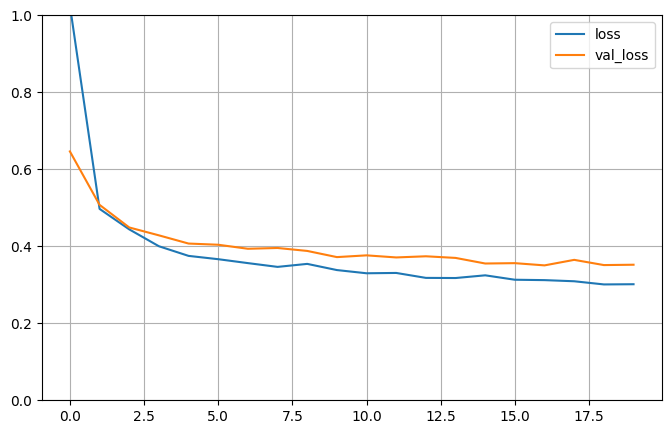

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1) #precisa definir o intervalo vertical para 0 até 1
plt.show()

In [17]:
mse_test_adam = model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3226


In [18]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


array([[0.56613016],
       [1.3953164 ],
       [4.210506  ]], dtype=float32)

Caso queira enviar um subconjunto de características pelo caminho amplo e um subconjunto diferente pelo caminho profundo, devemos utilizar diversas entradas.

Por exemplo: desejo enviar cinco características pelo caminho amplo (de 0 a 4), e seis pelo caminho profundo (2 a 7)

In [39]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B) #lidamos com camadas ocultas apenas no deep input
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2]) #concatenamos tudo antes da output layer
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

Especificamos os inputs ao criar o modelo, porém agora para chamar o método _fit()_, precisamos passar um par de matriz X_train_A e X_train_B. Como alterantiva podemos passar um dicionário mapeando os nomes de entrada:

{'wide_input': X_train_A, 'deep_input', X_train_B} -> ajuda bastante quando temos muitas entradas para evitar erro no ordenamento.

O mesmo vale para X_val, X_test e X_new para quando chamarmos o _evaluate()_ ou _predict()_

In [40]:
model.compile(loss='mse', optimizer='adam')

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_val_A, X_val_B = X_val[:, :5], X_val[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

X_train_dic = {
    'wide_input': X_train_A,
    'deep_input': X_train_B
}

X_val_dic = {
    'wide_input': X_val_A,
    'deep_input': X_val_B
}

X_test_dic = {
    'wide_input': X_test_A,
    'deep_input': X_test_B
}

X_new_dic = {
    'wide_input': X_new_A,
    'deep_input': X_new_B
}

In [41]:
history = model.fit(X_train_dic, y_train, epochs=20, validation_data=(X_val_dic, y_val))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.4063 - val_loss: 0.6303
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5205 - val_loss: 0.4516
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4364 - val_loss: 0.4204
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4175 - val_loss: 0.4104
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4047 - val_loss: 0.3952
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3911 - val_loss: 0.3996
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3864 - val_loss: 0.3799
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3882 - val_loss: 0.3686
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3638 - val_loss: 0.3634
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3685 - val_loss: 0.3679
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3552 - val_loss: 0.3536
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [42]:
mse_test = model.evaluate(X_test_dic, y_test)

y_pred = model.predict(X_new_dic)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3360


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [ ]:
import numpy as np
RMSE = np.sqrt(mse_test)
RMSE

np.float64(0.5693517195279238)

Alguns casos de uso:

- Podemos localizar e classificar o objeto principal de uma imagem, isso é uma tarefa de regressão (identificar as coordenadas do centro do objeto, largura e altura) e uma tarefa de classificação
- Podemos ter diversas tarefas independentes com base nos mesmos dados, podemos treinar uma rede neural por tarefa, mas obtemos melhores resultados em todas as tarefas treinando uma única rede neural com uma saída por tarefa
- Podemos utilizar saídas auxiliares para fazer o modelo aprender algo útil sozinha sem depender do restante da rede, sendo isso uma técnica de regularização com objetivo de reduzir overfitting e melhorar a capacidade de generalização.

# subclassing API para construir modelos dinâmicos

A subclassing API do Keras é útil principalmente quando o problema exige um nível de flexibilidade que as abordagens declarativas (Sequential e Functional) não conseguem oferecer bem.

Nas APIs tradicionais, você define a arquitetura de forma estática: primeiro declara todas as camadas e como elas se conectam, e só depois passa os dados. Isso traz vantagens como facilidade de visualização, validação automática e menor chance de erro estrutural. No entanto, esse modelo é limitado quando precisamos de comportamentos mais dinâmicos, como loops, condicionais, múltiplos fluxos com lógica customizada ou arquiteturas que mudam dependendo da entrada.

É nesse ponto que a subclassing API se destaca. Ao herdar de keras.Model, você passa a construir o modelo de forma imperativa, definindo as camadas no __init__ e controlando explicitamente o fluxo de dados no método call(). Isso permite implementar lógicas mais complexas, como ramificações condicionais, múltiplas saídas com tratamentos diferentes (como no exemplo com main_output e aux_output) e estruturas que não podem ser facilmente representadas como um grafo estático.

Por outro lado, essa flexibilidade tem um custo. O modelo deixa de ser totalmente transparente: sua arquitetura não é tão facilmente inspecionável, não pode ser salva ou clonada com a mesma simplicidade e há menos validações automáticas por parte do Keras. Isso aumenta a responsabilidade do desenvolvedor e a chance de erros.

Em resumo, a subclassing API é ideal quando você precisa de controle total sobre o comportamento do modelo, especialmente em cenários mais avançados ou de pesquisa. Porém, para problemas mais simples e estruturados, as APIs declarativas continuam sendo mais seguras, rápidas e fáceis de manter.

In [35]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        
        concat = keras.layers.concatenate([input_A, hidden2])
        
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        
        return main_output, aux_output
    
model = WideAndDeepModel()

# Salvando e armazenando o modelo

In [47]:
model.save('models/keras_model_wide_deep.keras') # salvei o modelo utilizado anteriormente, a classe acima precisaria se compilada e treinada para então poder salvar

In [ ]:
# Para carregar o modelo é tão simples quanto:
model = keras.models.load_model('models/keras_model_wide_deep.keras')

Caso tenhamos muitos e muitos dados, salvar o modelo apenas no fim do treinamento é algo ruim. Utilizamos checkpoints durante o treinamento para evitar perder tudo

# Usando funções de callbacks
O Keras chama os callbacks no início e fim de cada treinamento, época e antes e depois do processamento de cada batch. _ModelCheckpoint()_ salva os checkpoints do modelo em intervalos regulares durante o treinamento

In [ ]:
#Após a contrução e compilação do modelo utilizamos o seguinte código:
checkpoint = keras.callbacks.ModelCheckpoint('models/keras_model_wide_deep.keras', monitor='val_loss', save_best_only=True) # fazemos com que o checkpoimt salve o modelo quando  conjunto de validação for o melhor
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[checkpoint])
model = keras.models.load_model('models/keras_model_wide_deep.keras') # reverte para o melhor modelo

# TensorBoard para visualização
Ferramenta para visualização de curvas de treinamento durante o aprendizado, podemos usa para comparar com as diversas execuções, visualizar o grafo computacional, as imagens geradas pelo modelo, dados multidimensionais, estatísticas de treinamento e muito mais.

Para utilizar, devemos fazer com que o programa gere a saída dos dados em log binários chamados _event files_.

In [ ]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [52]:
# Keras oferece uma callback chamada TensorBoard()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train_dic, y_train, epochs=20, validation_data=(X_val_dic, y_val), callbacks=[tensorboard_cb])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.2912 - val_loss: 0.3201
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2889 - val_loss: 0.3014
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2925 - val_loss: 0.3231
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2879 - val_loss: 0.3024
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2875 - val_loss: 0.3365
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2869 - val_loss: 0.3005
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2868 - val_loss: 0.3019
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2854 - val_loss: 0.3114
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2862 - val_loss: 0.3027
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2834 - val_loss: 0.3157
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2869 - val_loss: 0.3152
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/st

# Aperfeiçoando os hiperparâmetros das redes neurais
Podemos utilizar o _GridSearchCV_ e o _RandomizedSearchCV_ para explorar o espaço do hiperparâmetro, mas para isso precisamos criar uma função que construirá e compilará um modelo Keras:

In [79]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape_=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(shape=input_shape_))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer_ = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer= optimizer_)
    return model

In [ ]:
# construiremos um KerasRegressor com base na função acima, porém conforme o livro tem uma função desatualizada, precisamos instalar o scikeras
# pip install scikeras[tensorflow]
from scikeras.wrappers import KerasRegressor
keras_reg = KerasRegressor(model=build_model, input_shape_=[X_train.shape[1]])

_KerasRegressor_ é um pequeno wrapper em torno do modelo Keras, onde podemos usar como um regressor da SKLearn

In [81]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_val, y_val),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100


c:\Proj\homl-deep-learning-ensemble-unsupervised\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4776 - val_loss: 0.5019
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4454 - val_loss: 0.3918
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4075 - val_loss: 0.3932
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3967 - val_loss: 0.4045
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3875 - val_loss: 0.3760
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3764 - val_loss: 0.3826
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3754 - val_loss: 0.3757
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3637 - val_loss: 0.3492
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3520 - val_loss: 0.3990
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3486 - val_loss: 0.3792
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3529 - val_loss: 0.3812
Epoch 12/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Quando queremos treinar centenas de variantes e ver qual delas apresenta um melhor desempenho, é preferível utilizar _RandomizedSearchCV()_ em vez do _GridSearchCV()_

In [86]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

# por estar usando o scikeras, os parâmetros do modelo precisam ser prefixados com model__.
params_ = {
    'model__n_hidden': [0, 1, 2, 3],
    'model__n_neurons': np.arange(1, 100),
    'model__learning_rate': reciprocal(1e-4, 1e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, params_, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_val, y_val),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100


c:\Proj\homl-deep-learning-ensemble-unsupervised\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Proj\homl-deep-learning-ensemble-unsupervised\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Proj\homl-deep-learning-ensemble-unsupervised\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Proj\homl-deep-learning-ensemble-unsupervised\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which poi

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.0163 - val_loss: 6.7807
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5146 - val_loss: 6.2620
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0712 - val_loss: 5.8003
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.6773 - val_loss: 5.3884
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.3204 - val_loss: 5.0109
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.9941 - val_loss: 4.6580
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6969 - val_loss: 4.3368
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4212 - val_loss: 4.0401
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.1672 - val_loss: 3.7598
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9316 - val_loss: 3.5147
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7129 - val_loss: 3.2589
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

c:\Proj\homl-deep-learning-ensemble-unsupervised\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.4842 - val_loss: 8.0039
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.8548 - val_loss: 7.3252
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.2795 - val_loss: 6.7110
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7506 - val_loss: 6.1469
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.2669 - val_loss: 5.6402
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8232 - val_loss: 5.1751
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4158 - val_loss: 4.7502
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0428 - val_loss: 4.3628
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7014 - val_loss: 4.0088
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3881 - val_loss: 3.6857
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1014 - val_loss: 3.3927
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

c:\Proj\homl-deep-learning-ensemble-unsupervised\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.7825 - val_loss: 9.6915
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.9249 - val_loss: 8.7918
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.1616 - val_loss: 7.9628
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.4717 - val_loss: 7.2190
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8531 - val_loss: 6.5564
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.3016 - val_loss: 5.9473
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8047 - val_loss: 5.3975
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3596 - val_loss: 4.9113
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9608 - val_loss: 4.4633
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6014 - val_loss: 4.0639
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.2782 - val_loss: 3.6974
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

c:\Proj\homl-deep-learning-ensemble-unsupervised\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Proj\homl-deep-learning-ensemble-unsupervised\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Proj\homl-deep-learning-ensemble-unsupervised\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Proj\homl-deep-learning-ensemble-unsupervised\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which poi

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1068 - val_loss: 4.5649
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2130 - val_loss: 3.7565
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5034 - val_loss: 3.1114
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9265 - val_loss: 2.5936
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4531 - val_loss: 2.1621
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0616 - val_loss: 1.8115
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7374 - val_loss: 1.5206
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4688 - val_loss: 1.2821
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2478 - val_loss: 1.0869
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0679 - val_loss: 0.9313
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9239 - val_loss: 0.8065
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

c:\Proj\homl-deep-learning-ensemble-unsupervised\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6758 - val_loss: 5.4691
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.6137 - val_loss: 4.4719
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8330 - val_loss: 3.7062
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2313 - val_loss: 3.1171
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7491 - val_loss: 2.6366
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3496 - val_loss: 2.2359
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0130 - val_loss: 1.8963
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7295 - val_loss: 1.6151
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4915 - val_loss: 1.3810
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2945 - val_loss: 1.1903
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1333 - val_loss: 1.0346
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

c:\Proj\homl-deep-learning-ensemble-unsupervised\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.6663 - val_loss: 6.8117
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.7263 - val_loss: 5.8055
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.9561 - val_loss: 4.9774
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.3200 - val_loss: 4.2940
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7962 - val_loss: 3.7344
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3644 - val_loss: 3.2717
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0089 - val_loss: 2.8884
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7186 - val_loss: 2.5729
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4808 - val_loss: 2.3124
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2872 - val_loss: 2.0966
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1307 - val_loss: 1.9165
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

c:\Proj\homl-deep-learning-ensemble-unsupervised\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Proj\homl-deep-learning-ensemble-unsupervised\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Proj\homl-deep-learning-ensemble-unsupervised\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Proj\homl-deep-learning-ensemble-unsupervised\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which poi

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.3977 - val_loss: 6.6043
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.4416 - val_loss: 5.7236
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.6625 - val_loss: 4.9844
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0262 - val_loss: 4.3871
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5037 - val_loss: 3.8883
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0699 - val_loss: 3.4716
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7047 - val_loss: 3.1156
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3949 - val_loss: 2.8068
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1277 - val_loss: 2.5370
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8941 - val_loss: 2.3119
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6882 - val_loss: 2.0831
Epoch 12/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KerasRegresso...se epochs=1 )
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'model__learning_rate': <scipy.stats....0015A92F02450>, 'model__n_hidden': [0, 1, ...], 'model__n_neurons': array([ 1, 2..., 97, 98, 99])}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used h

In [87]:
rnd_search_cv.best_params_

{'model__learning_rate': np.float64(0.0003228398337457386),
 'model__n_hidden': 0,
 'model__n_neurons': np.int64(77)}

In [88]:
rnd_search_cv.best_score_

np.float64(0.6084612787965359)

In [89]:
model = rnd_search_cv.best_estimator_.model

Algumas bibliotecas que podemos utilizar para otimizar os hiperparâmetros:

- Hyperopt:
    Busca otimizar todos os tipos de espaço de pesquisa complexos (valores reais como taxa de aprendizado, valores discretos como número de camadas)
- Hyperas, kopt ou Talos:
    Úteis para otimizar hiperparâmetros para modelos Keras
- Keras Tuner:
    Biblioteca de otimização de hiperparâmetros do Google fácil de usar para modelos Keras, com serviço hospedado para visualização e análise.
- Scikit-Optimize (skopt):
    Biblioteca de otimização de uso geral, a classe _BayesSearchCV()_ usa uma otimização bayesiana com interface semelhante ao _GridSearchCV()_
- Spearmint:
    Otimização Bayesiana
- Hyperband:
    Biblioteca de ajuste rápido de hiperparâmetros
- SKlearn-Deap:
    Biblioteca de otimização baseada em algoritmos evolutivos com uma interface semelhante ao _GridSearchCV()_